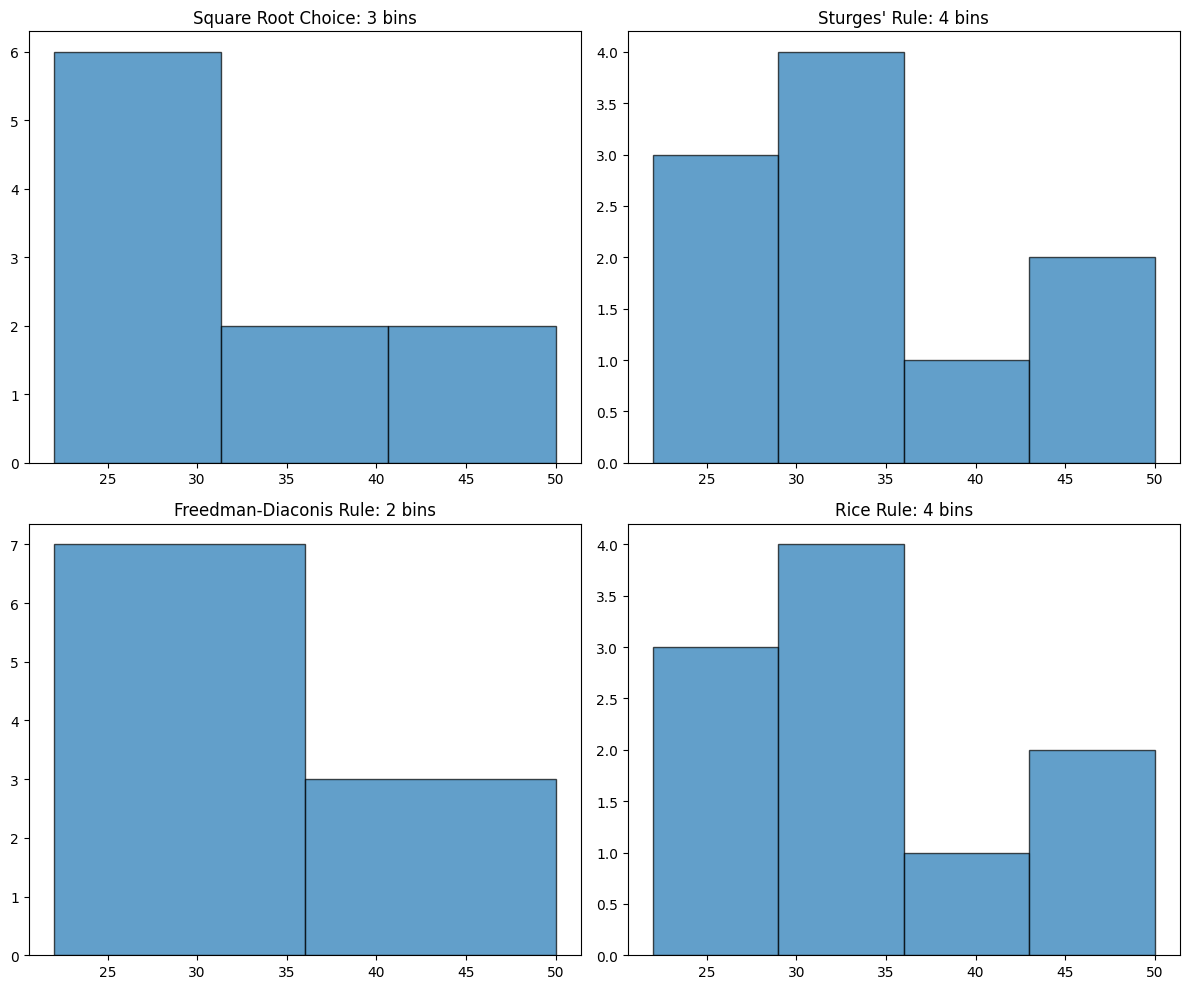

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample DataFrame
data = pd.DataFrame({
    'Age': [22, 29, 31, 25, 28, 35, 40, 29, 50, 45]
})

# Number of data points
n = len(data['Age'])

# Square Root Choice
bins_sqrt = int(np.sqrt(n))

# Sturges' Rule
bins_sturges = int(np.log2(n) + 1)

# Freedman-Diaconis Rule
iqr = data['Age'].quantile(0.75) - data['Age'].quantile(0.25)
bin_width_fd = 2 * iqr / n**(1/3)
bins_fd = int((data['Age'].max() - data['Age'].min()) / bin_width_fd)

# Rice Rule
bins_rice = int(2 * n**(1/3))

# Plot histograms with different bin choices
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.hist(data['Age'], bins=bins_sqrt, edgecolor='black', alpha=0.7)
plt.title(f'Square Root Choice: {bins_sqrt} bins')

plt.subplot(2, 2, 2)
plt.hist(data['Age'], bins=bins_sturges, edgecolor='black', alpha=0.7)
plt.title(f'Sturges\' Rule: {bins_sturges} bins')

plt.subplot(2, 2, 3)
plt.hist(data['Age'], bins=bins_fd, edgecolor='black', alpha=0.7)
plt.title(f'Freedman-Diaconis Rule: {bins_fd} bins')

plt.subplot(2, 2, 4)
plt.hist(data['Age'], bins=bins_rice, edgecolor='black', alpha=0.7)
plt.title(f'Rice Rule: {bins_rice} bins')

plt.tight_layout()
plt.show()


(array([2., 4., 1., 1., 2.]),
 array([22. , 27.6, 33.2, 38.8, 44.4, 50. ]),
 <BarContainer object of 5 artists>)

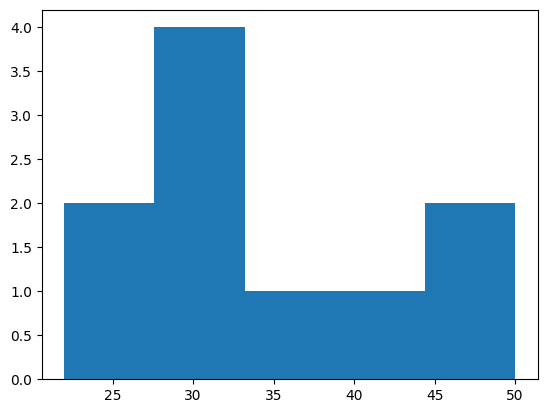

In [2]:
plt.hist(data['Age'], bins='auto')


In [3]:
##OutLier Detection Function:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers
